In [3]:
import pandas as pd
import numpy as np
from google.cloud import bigquery

In [6]:
bqclient = bigquery.Client()

# Download query results.
query_string = """
SELECT *
FROM `qwiklabs-asl-04-5e165f533cac.beer_recom.ratings`
WHERE review_profilename IS NOT NULL
"""

ratings = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
        create_bqstorage_client=True,
    )
)

In [9]:
ratings.head()

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_time
0,447,Pabst Brewing Company,2.0,1.5,1.5,roddwolff,Low Alcohol Beer,1.5,2.0,Old Milwaukee Non Alcoholic,0.40,5719,1263519646
1,306,Coors Brewing Company,1.5,1.5,1.5,DoubleJ,Low Alcohol Beer,2.0,2.0,Coors Non-Alcoholic,0.50,8588,1173243107
2,433,Molson Coors Canada,2.0,2.5,3.0,MaltyGoodness,American Malt Liquor,3.0,2.0,Molson XXX,7.30,3829,1136238005
3,4861,Frankenmuth Brewery,3.0,3.5,2.5,masey222,Irish Red Ale,3.5,2.0,Frankenmuth Red Sky Ale,5.25,60018,1291605082
4,2089,ReaperAle,3.0,2.0,4.0,jsp2,Foreign / Export Stout,4.0,2.0,Mortality Stout,7.75,5419,1234668362


<AxesSubplot:>

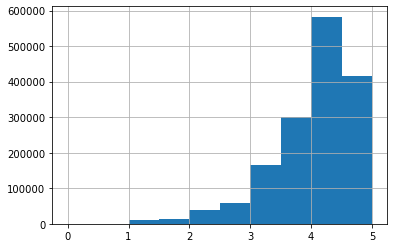

In [23]:
ratings["review_overall"].hist()

<AxesSubplot:>

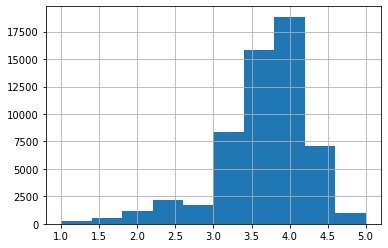

In [25]:
(
    ratings
    .groupby(["beer_name"])["review_overall"]
    .agg(["mean", "count"])
    .reset_index(drop=False)["mean"].hist()
)

In [39]:
(
    ratings
    .groupby(["beer_name"])["review_overall"]
    .agg(["mean", "count"])
    .reset_index(drop=False)
    .sort_values("count", ascending=False, ignore_index=True)
    .query("mean > 4.25")
    .head(50)
)

,beer_name,mean,count
4,Two Hearted Ale,4.330216,2727
8,Stone IPA (India Pale Ale),4.257576,2574
9,Pliny The Elder,4.590028,2527
10,Founders Breakfast Stout,4.354658,2501
13,La Fin Du Monde,4.298027,2483
16,Duvel,4.342180,2449
18,Bell's Hopslam Ale,4.377609,2443
26,St. Bernardus Abt 12,4.327843,2216
28,Trappistes Rochefort 10,4.339401,2170
29,Ayinger Celebrator Doppelbock,4.299081,2068


In [27]:
ratings["beer_name"].nunique()

56856

In [38]:
6088 / 56856

0.10707752919656677